<a href="https://colab.research.google.com/github/mayafetzer/cheg472/blob/main/Exploring_Hydrogen_Storage_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maya Fetzer

CHEG472

Exploring Hydrogen Storage with Machine Learning

Objective: To understand the potential of carbonaceous nanomaterials for hydrogen storage and how machine learning can predict their storage capacity.

Background: Hydrogen is a promising energy carrier due to its environmental benefits. Traditional storage methods face challenges, prompting research into solid-state materials like carbonaceous nanomaterials. This exercise will guide you through analyzing a dataset and applying machine learning techniques to predict hydrogen storage capacity.

### Part 1: Dataset Exploration
Download the Dataset:

Access the dataset provided. Ensure you understand its structure, including the features and the target variable (hydrogen storage capacity).
Data Inspection:

Use Google colab or VS code editor to load and inspect the dataset.
Check for missing values, data types, and basic statistics (mean, median, standard deviation).
Data Visualization:

Create visualizations to understand the distribution of features and the relationship between features and the target variable. You may use heat map or scatter plots or pair wise plots. Only show the relationships between features and targets
Use libraries like Matplotlib or Seaborn in Python.

In [42]:
# Install the necessary libraries for machine learning

!pip install shap -q

# Libraries for data analysis
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split

# Libraries for machine learning
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
import numpy as np

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
import joblib
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import xgboost as xgb

# Import filters to remove unnecessary warnings
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import ConvergenceWarning

from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

# Import filters to remove unnecessary warnings
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score, mean_absolute_error
import shap

## 1. Download the dataset:

The first thing that you need to do for machine learning is upload and understand the dataset that you are using. Then you need to remove any missing values, duplicates, or outliers so that the data set is ready for machine learning.

In [6]:
# Replace '/path/to/your/file.xlsx' with the actual file path
file_path = '/content/Hydrogen storage dataset.xlsx'

# Load the data, skipping the first two rows and using the third row as header
df = pd.read_excel(file_path, header=2)

# Look at the dataset to gain a basic understanding of its structure
df.head()

,Material name,Average crystal size (nm),Crystalinity index (%),BET surface area (m²/g),Pore volume (cm³/g),Temperature (K),Pressure (bar),Hydrogen uptake/adsorption (wt%),Hydrogen desorption (wt%)
0,Carbon nanotube functionalized with HNO3 at 80 °C,3.780644,82.394903,125.2,1.018,298.0,0,0.000000,0.011229
1,Carbon nanotube functionalized with HNO3 at 80 °C,3.780644,82.394903,125.2,1.018,298.0,4.89664,0.013857,NaN
2,Carbon nanotube functionalized with HNO3 at 80 °C,3.780644,82.394903,125.2,1.018,298.0,10.0696,0.018396,0.027713
3,Carbon nanotube functionalized with HNO3 at 80 °C,3.780644,82.394903,125.2,1.018,298.0,20.0167,0.032969,0.040136
4,Carbon nanotube functionalized with HNO3 at 80 °C,3.780644,82.394903,125.2,1.018,298.0,29.8414,0.043720,0.049454


In [7]:
# Describe the dataset to
df.describe()

,Average crystal size (nm),Crystalinity index (%),BET surface area (m²/g),Pore volume (cm³/g),Temperature (K),Hydrogen uptake/adsorption (wt%),Hydrogen desorption (wt%)
count,539.000000,539.000000,539.000000,539.000000,539.000000,423.000000,151.000000
mean,8.166266,49.162962,258.195065,0.838367,246.267191,0.601873,0.750073
std,4.560454,16.764251,214.466418,0.609617,152.823071,0.736683,0.662720
min,2.977754,18.900143,39.200000,0.021000,77.000000,0.000000,0.011229
25%,3.669600,36.381961,89.060000,0.307000,77.000000,0.128914,0.322376
50%,9.032235,52.881608,204.000000,0.530000,298.000000,0.429348,0.527149
75%,12.543453,62.089987,428.000000,1.410000,298.150000,0.714981,1.039475
max,15.712170,82.394903,870.000000,1.891000,873.150000,4.797770,3.286860


## 2. Data inspection:

Use Google colab or VS code editor to load and inspect the dataset. Check for missing values, data types, and basic statistics (mean, median, standard deviation). Handle any msising values, incorrect data types, duplicates, etc. in the manner that is most appropriate for the dataset.

In [8]:
# Check the data types of each column
column_types = df.dtypes

print("Column types:\n", column_types)

Column types:
 Material name                        object
Average crystal size (nm)           float64
Crystalinity index (%)              float64
 BET surface area (m²/g)            float64
Pore volume (cm³/g)                 float64
Temperature (K)                     float64
Pressure (bar)                       object
Hydrogen uptake/adsorption (wt%)    float64
Hydrogen desorption (wt%)           float64
dtype: object


In [9]:
# Convert the column ['Pressure (bar)'] from an object to a float
df['Pressure (bar)'] = pd.to_numeric(df['Pressure (bar)'], errors='coerce')

# Check the data types of each column again
column_types = df.dtypes

print("Column types:\n", column_types)

Column types:
 Material name                        object
Average crystal size (nm)           float64
Crystalinity index (%)              float64
 BET surface area (m²/g)            float64
Pore volume (cm³/g)                 float64
Temperature (K)                     float64
Pressure (bar)                      float64
Hydrogen uptake/adsorption (wt%)    float64
Hydrogen desorption (wt%)           float64
dtype: object


In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Duplicate rows:", duplicate_rows)

Missing values:
 Material name                         0
Average crystal size (nm)             0
Crystalinity index (%)                0
 BET surface area (m²/g)              0
Pore volume (cm³/g)                   0
Temperature (K)                       0
Pressure (bar)                        2
Hydrogen uptake/adsorption (wt%)    116
Hydrogen desorption (wt%)           388
dtype: int64
Duplicate rows: 0


In [11]:
# Replace the missing values in the dataset with the average value in the column

# Replace missing values in the 'Hydrogen uptake/adsorption (wt%)' column with the average
df['Hydrogen uptake/adsorption (wt%)'] = df['Hydrogen uptake/adsorption (wt%)'].fillna(df['Hydrogen uptake/adsorption (wt%)'].mean())
# Replace missing values in the 'Hydrogen desorption (wt%)' column with the average
df['Hydrogen desorption (wt%)'] = df['Hydrogen desorption (wt%)'].fillna(df['Hydrogen desorption (wt%)'].mean())
# Replace missing values in the 'Pressure (bar)' column with the average
df['Pressure (bar)'] = df['Pressure (bar)'].fillna(df['Pressure (bar)'].mean())

In [12]:
# Confirm that missing values and duplicates are removed
print("Missing values after removal:\n", df.isnull().sum())
print("Duplicate rows after removal:", df.duplicated().sum())

Missing values after removal:
 Material name                       0
Average crystal size (nm)           0
Crystalinity index (%)              0
 BET surface area (m²/g)            0
Pore volume (cm³/g)                 0
Temperature (K)                     0
Pressure (bar)                      0
Hydrogen uptake/adsorption (wt%)    0
Hydrogen desorption (wt%)           0
dtype: int64
Duplicate rows after removal: 0


Outliers in column 'Average crystal size (nm)': 0
Outliers in column 'Crystalinity index (%)': 0
Outliers in column ' BET surface area (m²/g)': 0
Outliers in column 'Pore volume (cm³/g)': 0
Outliers in column 'Temperature (K)': 1
Outliers in column 'Pressure (bar)': 0
Outliers in column 'Hydrogen uptake/adsorption (wt%)': 53
Outliers in column 'Hydrogen desorption (wt%)': 151


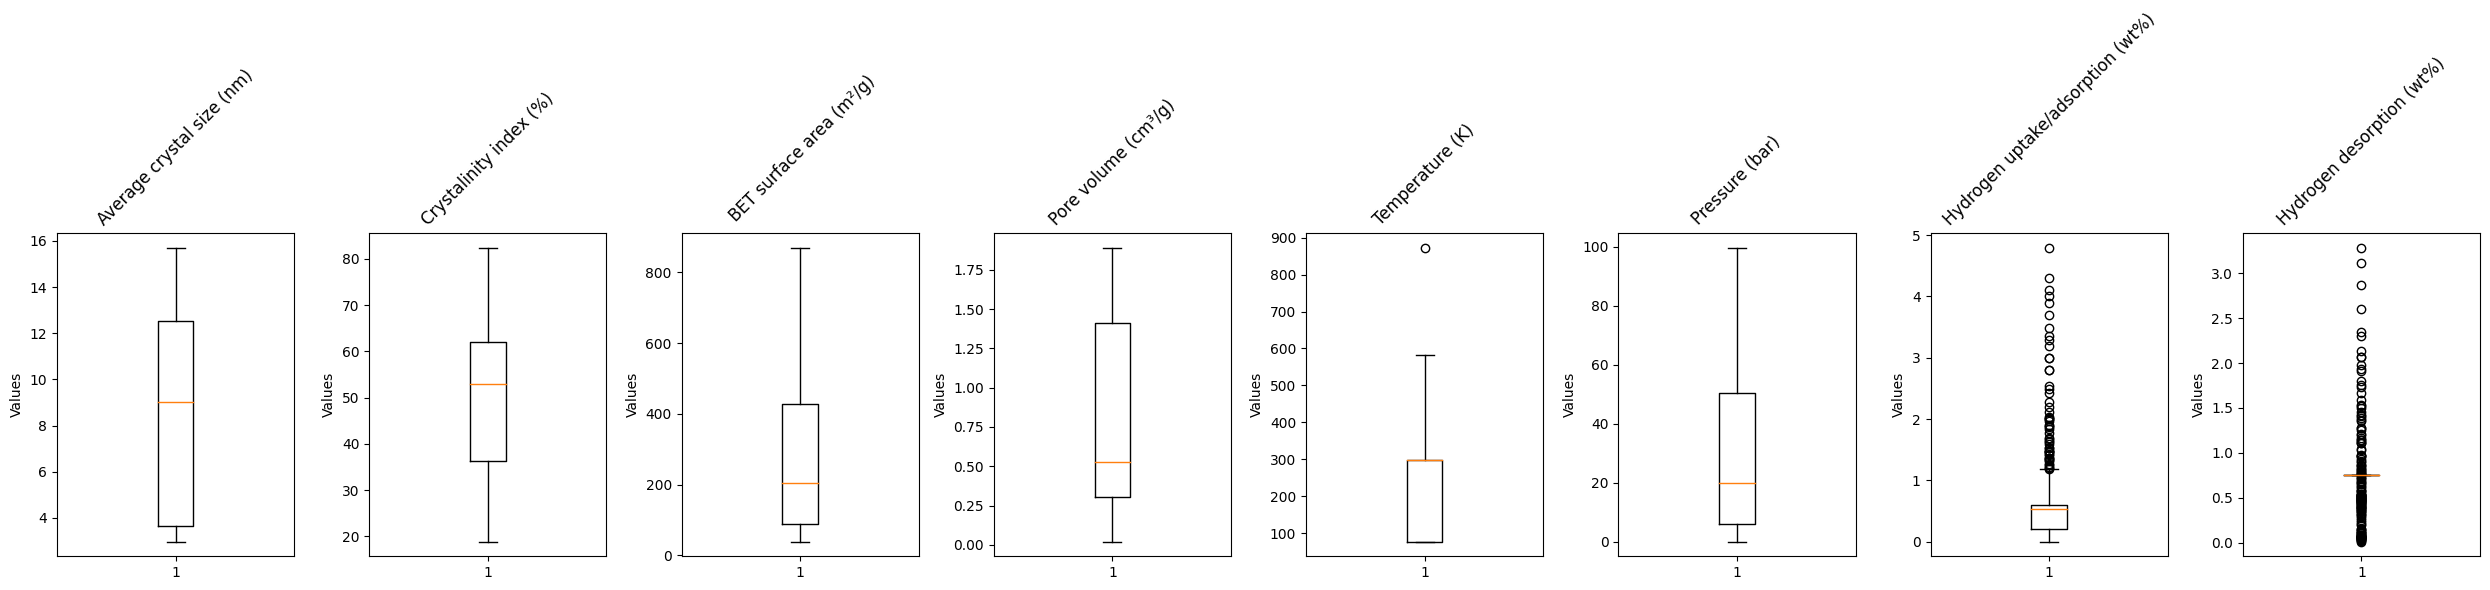

In [13]:
# Count and display the number of outliers in the df

# Calculate outliers for each column
outliers_dict = {}

# Only check the columns that are numerical and would contain outliers
columns_to_check = df.select_dtypes(include=['int64', 'float64']).columns

# Check for outliers and count them
for col in columns_to_check:
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_dict[col] = outliers.tolist()

    # Print the total number of outliers for the current column
    print(f"Outliers in column '{col}': {len(outliers)}")

# Create a figure with subplots for each column
fig, axes = plt.subplots(1, len(columns_to_check), figsize=(25, 6))  # Adjust figsize as needed

# Iterate through each column and create a boxplot on its own subplot
for i, col in enumerate(columns_to_check):
  q1 = np.quantile(df[col], 0.25)
  q3 = np.quantile(df[col], 0.75)
  axes[i].boxplot([df[col]])  # Plot data for a single column
  axes[i].set_title(col, rotation=45)  # Set title and rotate it by 45 degrees
  axes[i].set_ylabel('Values')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [21]:
# Print summary statistics for the entire DataFrame
summary_statistics = df.describe()
# Display the summary statistics
print(summary_statistics)

       Average crystal size (nm)  Crystalinity index (%)  \
count                 539.000000              539.000000   
mean                    0.407440                0.476619   
std                     0.358120                0.264026   
min                     0.000000                0.000000   
25%                     0.054329                0.275327   
50%                     0.475442                0.535185   
75%                     0.751169                0.680211   
max                     1.000000                1.000000   

        BET surface area (m²/g)  Pore volume (cm³/g)  Temperature (K)  \
count                539.000000           539.000000       539.000000   
mean                   0.263595             0.437095         0.212607   
std                    0.258144             0.325999         0.191953   
min                    0.000000             0.000000         0.000000   
25%                    0.060014             0.152941         0.000000   
50%                  

Because all of the outliers exist in the two hydrogen variables, I chose not the remove them. There are so many outliers in comparison to the amount of datapoints that removing them will not help the machine learning. There will not be enough data if I remove the outliers so I am choosing to keep them.

In [14]:
# Display the first few rows of the original dataset
print("Original DataFrame:")
print(df.head())

# Get the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, prefix_sep='_')

# Display the first few rows of the encoded DataFrame
print("\nEncoded DataFrame:")
print(df.head())

Original DataFrame:
                                       Material name  \
0  Carbon nanotube functionalized with HNO3 at 80 °C   
1  Carbon nanotube functionalized with HNO3 at 80 °C   
2  Carbon nanotube functionalized with HNO3 at 80 °C   
3  Carbon nanotube functionalized with HNO3 at 80 °C   
4  Carbon nanotube functionalized with HNO3 at 80 °C   

   Average crystal size (nm)  Crystalinity index (%)  \
0                   3.780644               82.394903   
1                   3.780644               82.394903   
2                   3.780644               82.394903   
3                   3.780644               82.394903   
4                   3.780644               82.394903   

    BET surface area (m²/g)  Pore volume (cm³/g)  Temperature (K)  \
0                     125.2                1.018            298.0   
1                     125.2                1.018            298.0   
2                     125.2                1.018            298.0   
3                     125.2   

Using heat maps, we can visualize the correlations between the feature variables and the target variables.

Correlations for Hydrogen uptake/adsorption (wt%)
 
Average crystal size (nm)                                                                       0.278012
Crystalinity index (%)                                                                         -0.179082
 BET surface area (m²/g)                                                                        0.046757
Pore volume (cm³/g)                                                                            -0.326051
Temperature (K)                                                                                 0.242560
Pressure (bar)                                                                                  0.086433
Hydrogen uptake/adsorption (wt%)                                                                1.000000
Hydrogen desorption (wt%)                                                                       0.034558
Material name_CNT decorated with Ni at mass ratio of 10                                        -0.110513
Mat

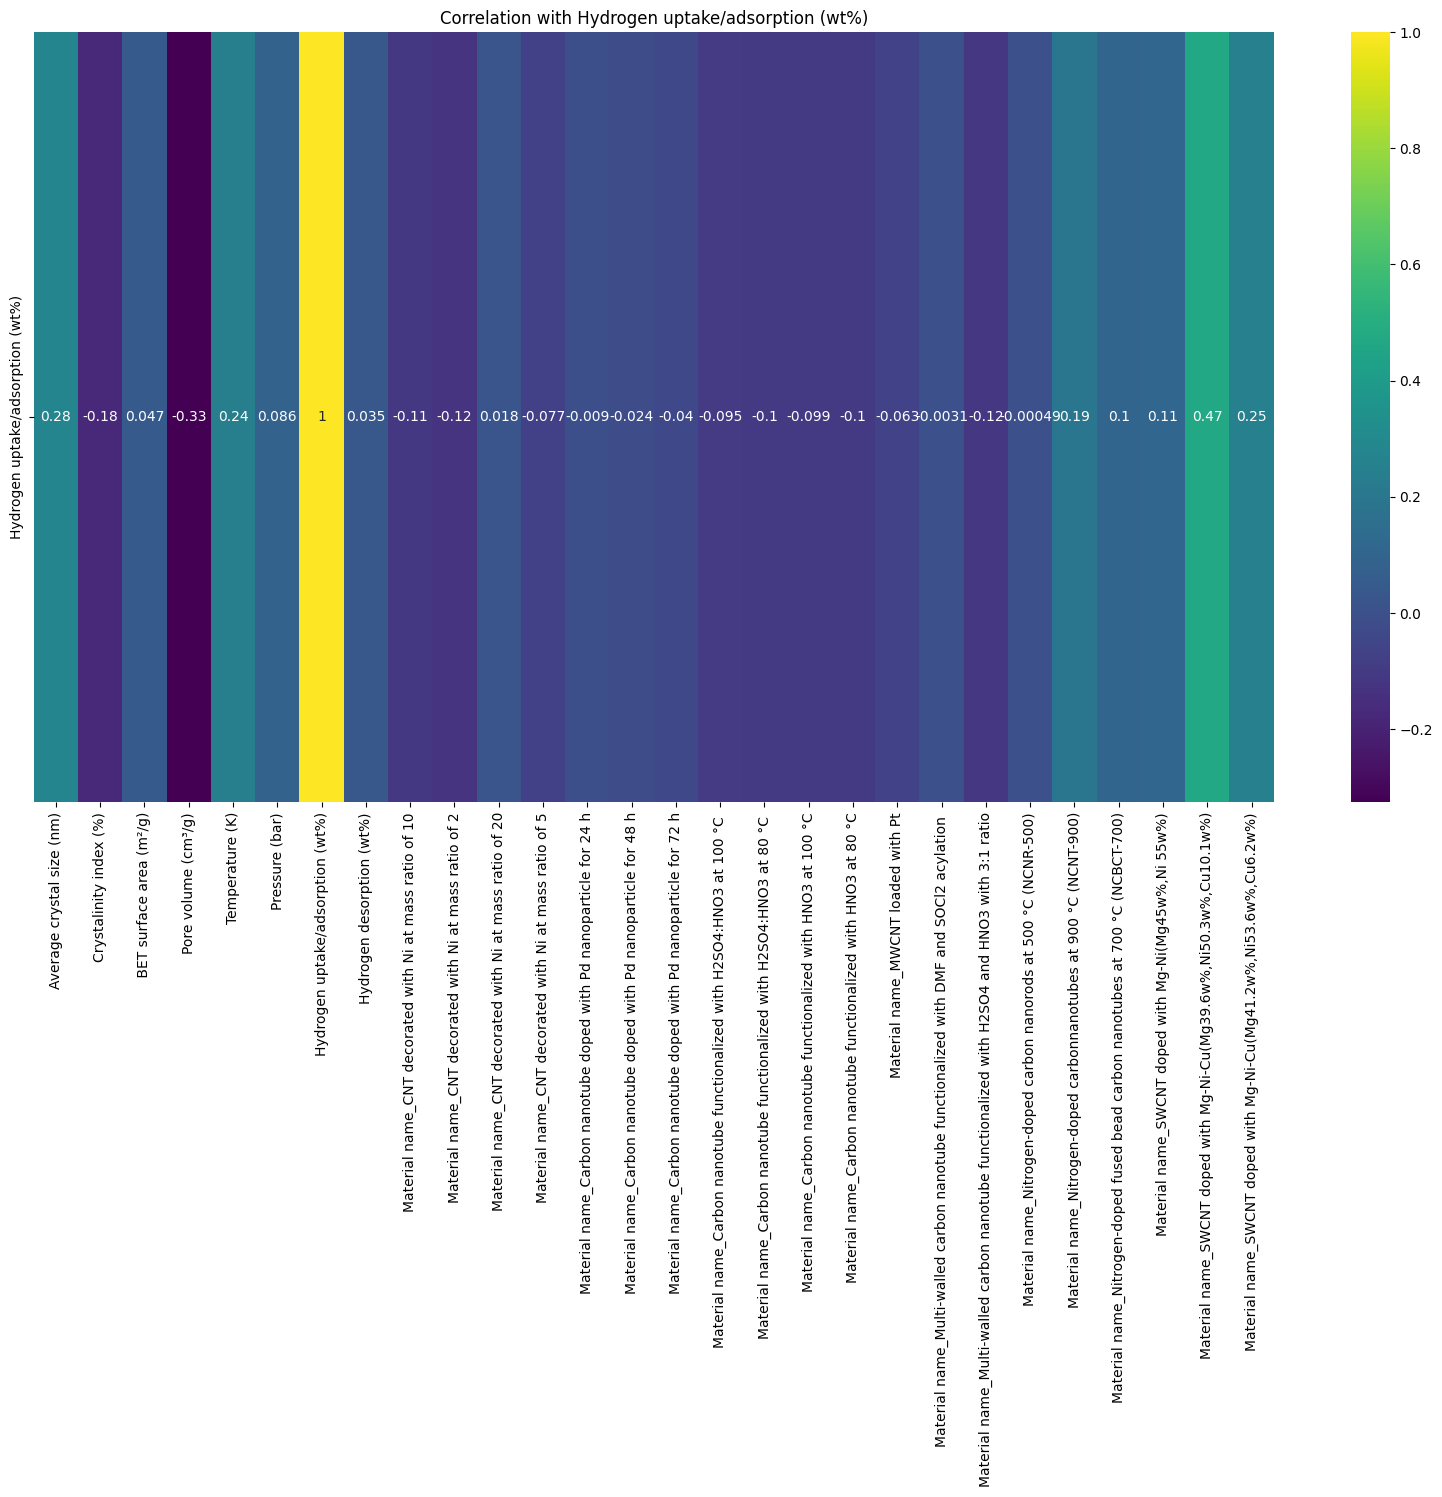

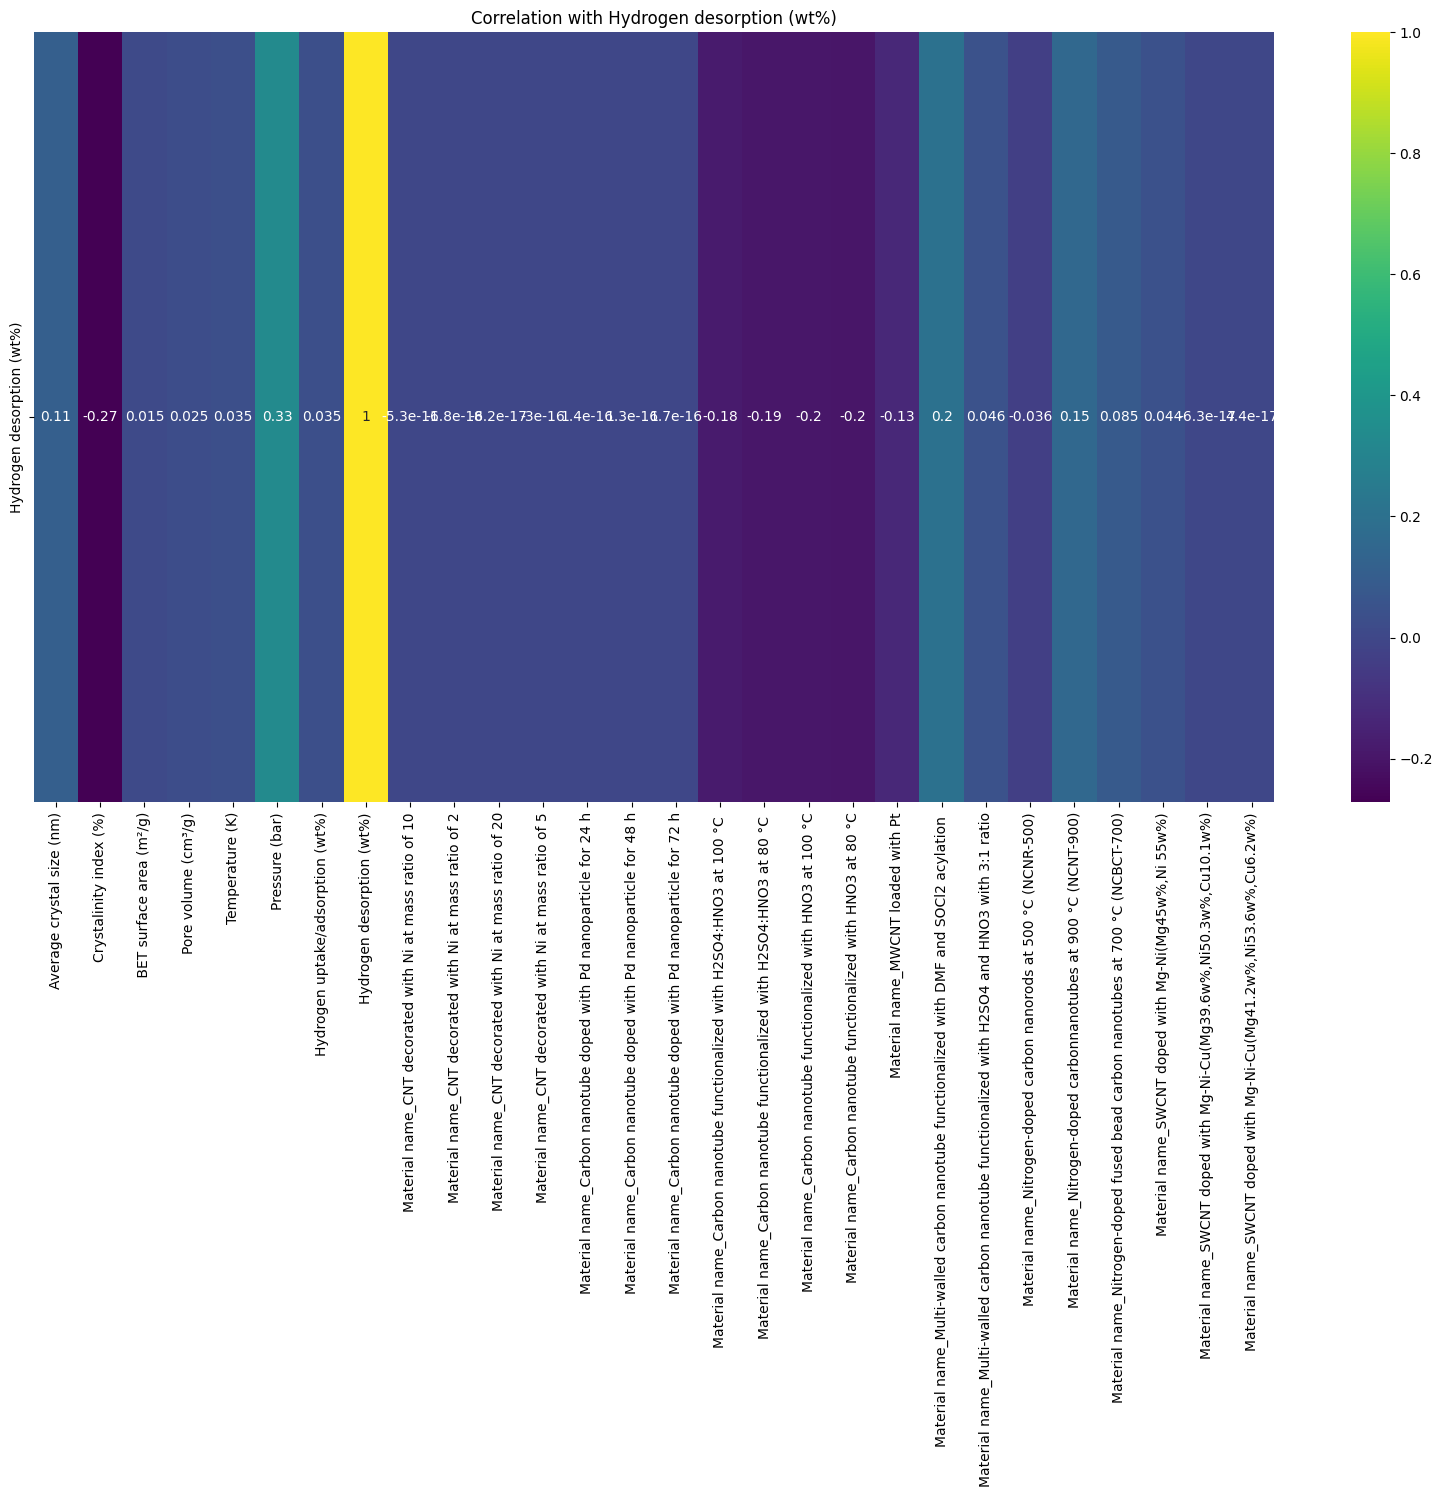

In [15]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])  # Selecting only numerical columns
correlations_uptake = df.corr()['Hydrogen uptake/adsorption (wt%)']  # Computing the correlation matrix
print("Correlations for Hydrogen uptake/adsorption (wt%)")
print(" ")
print(correlations_uptake)
print(" ")

correlations_desorption =df.corr()['Hydrogen desorption (wt%)']  # Computing the correlation matrix
print("Correlations for Hydrogen desorption (wt%)")
print(" ")
print(correlations_desorption)

# Create heatmap for 'Hydrogen uptake/adsorption (wt%)'
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr()['Hydrogen uptake/adsorption (wt%)'].to_frame().T, annot=True, cmap="viridis")
plt.title("Correlation with Hydrogen uptake/adsorption (wt%)")
plt.show()

# Create heatmap for 'Hydrogen desorption (wt%)'
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr()['Hydrogen desorption (wt%)'].to_frame().T, annot=True, cmap="viridis")
plt.title("Correlation with Hydrogen desorption (wt%)")
plt.show()

Based on the above correaltion plots, we can make scatter plots of the most significant variables.

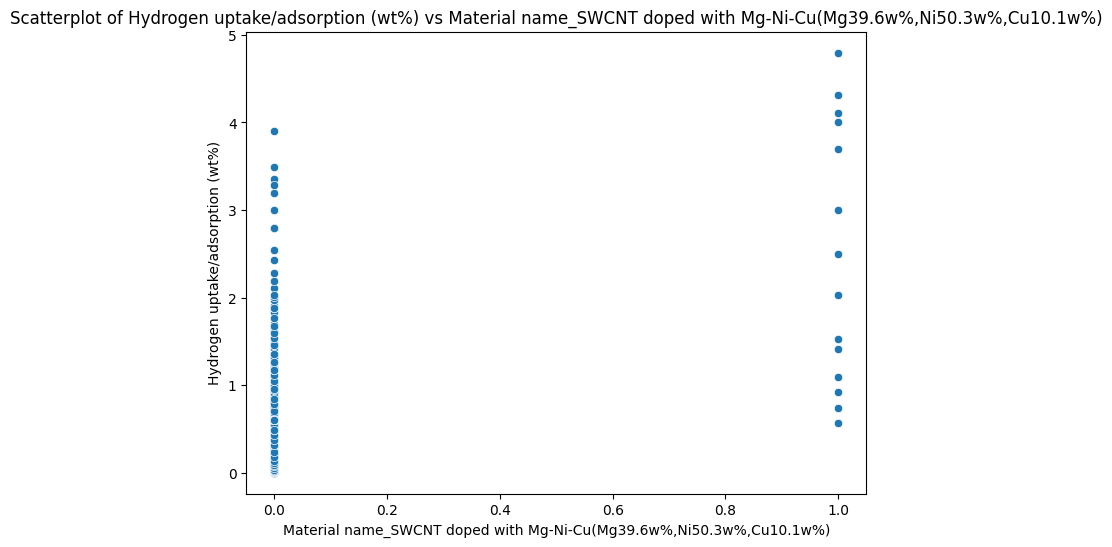

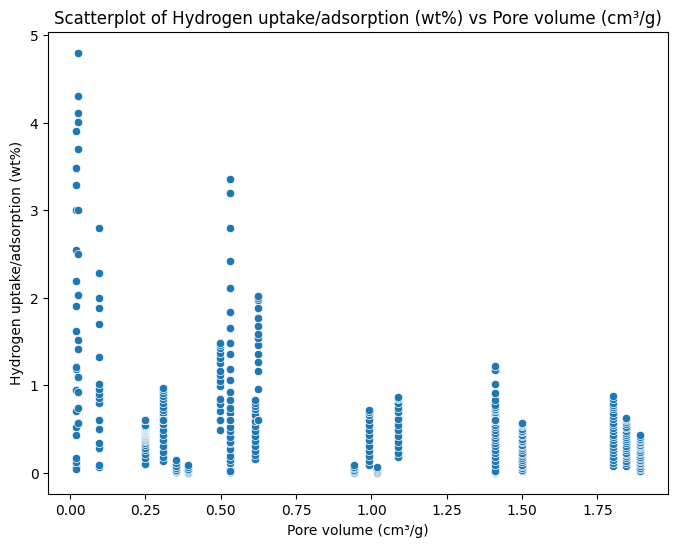

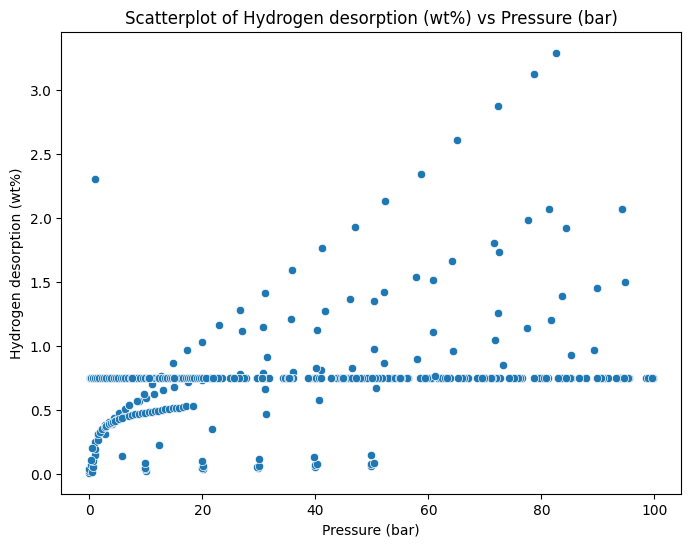

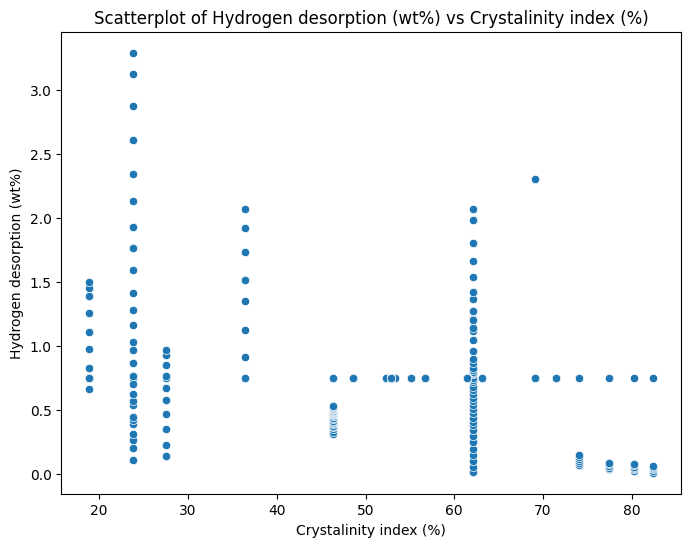

In [16]:
# Getting the two most significant correlations (ignoring self-correlation which is 1)
top_two_uptake = correlations_uptake.abs().sort_values(ascending=False).index[1:3]
top_two_desorption = correlations_desorption.abs().sort_values(ascending=False).index[1:3]

# Scatterplots for Hydrogen uptake/adsorption (wt%) with its top 2 correlations
for column in top_two_uptake:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=column, y='Hydrogen uptake/adsorption (wt%)')
    plt.title(f'Scatterplot of Hydrogen uptake/adsorption (wt%) vs {column}')
    plt.show()

# Scatterplots for Hydrogen desorption (wt%) with its top 2 correlations
for column in top_two_desorption:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=column, y='Hydrogen desorption (wt%)')
    plt.title(f'Scatterplot of Hydrogen desorption (wt%) vs {column}')
    plt.show()

### Part 2: Data Preprocessing:

Handle any missing values and perform necessary data transformations (normalization or encoding categorical variables).
Split the dataset into training and testing sets (typically 80/20). You may use cross - validation.

The dataframe was already one-hot encoded above. To help make sure that the model isn't skewed, all of the numerical values were normalized.

In [20]:
# Selecting only the numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the numerical columns
df[numerical_columns.columns] = scaler.fit_transform(numerical_columns)

# Now the numerical columns in df are normalized between 0 and 1
print(df.head())

   Average crystal size (nm)  Crystalinity index (%)  \
0                   0.063049                     1.0   
1                   0.063049                     1.0   
2                   0.063049                     1.0   
3                   0.063049                     1.0   
4                   0.063049                     1.0   

    BET surface area (m²/g)  Pore volume (cm³/g)  Temperature (K)  \
0                  0.103515             0.533155         0.277586   
1                  0.103515             0.533155         0.277586   
2                  0.103515             0.533155         0.277586   
3                  0.103515             0.533155         0.277586   
4                  0.103515             0.533155         0.277586   

   Pressure (bar)  Hydrogen uptake/adsorption (wt%)  \
0        0.000000                          0.000000   
1        0.049088                          0.002888   
2        0.100947                          0.003834   
3        0.200665           

Training Models for Hydrogen uptake/adsorption (wt%)
Random Forest Mean Squared Error: 0.0015
Random Forest R² Score: 0.8251


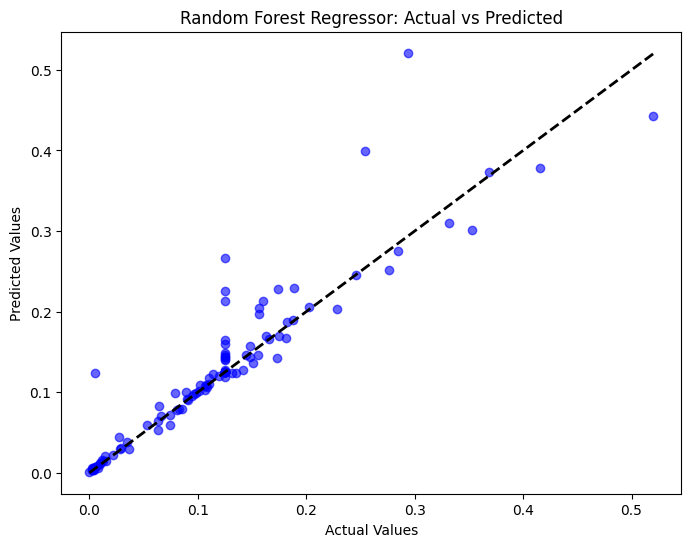

Decision Tree Mean Squared Error: 0.0025
Decision Tree R² Score: 0.7035


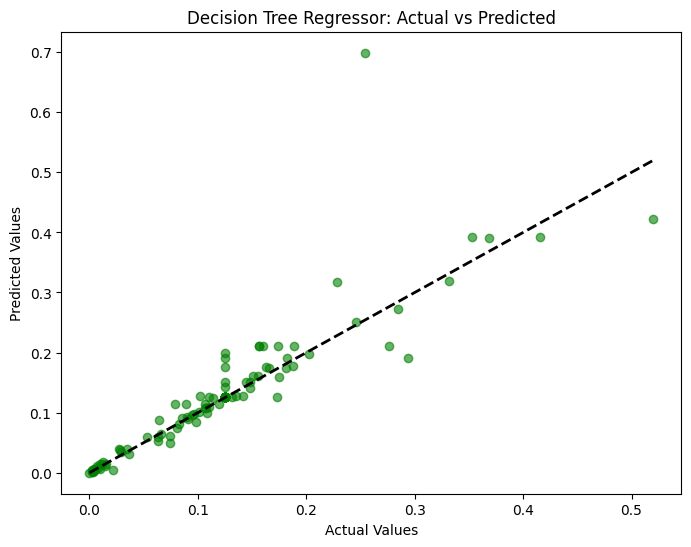

XGBoost Mean Squared Error: 0.0013
XGBoost R² Score: 0.8397


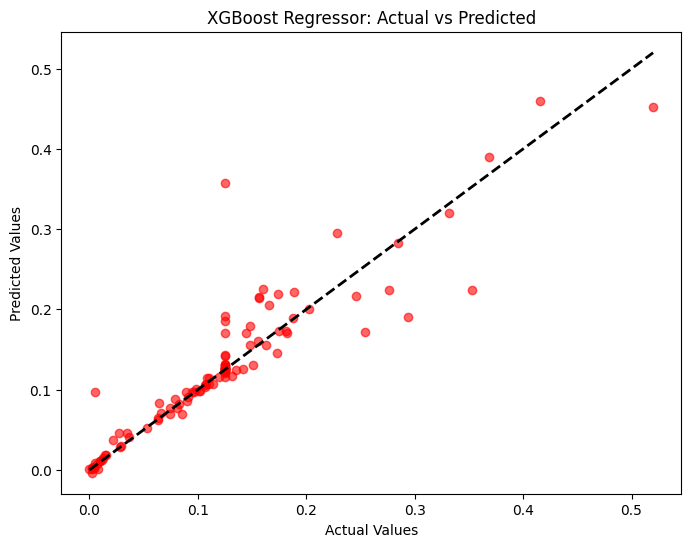

Training Models for Hydrogen desorption (wt%)
Random Forest Mean Squared Error: 0.0023
Random Forest R² Score: 0.8461


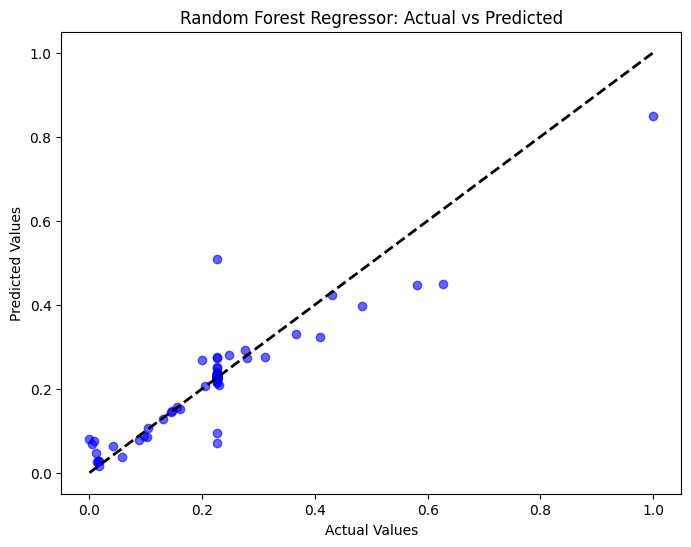

Decision Tree Mean Squared Error: 0.0014
Decision Tree R² Score: 0.9029


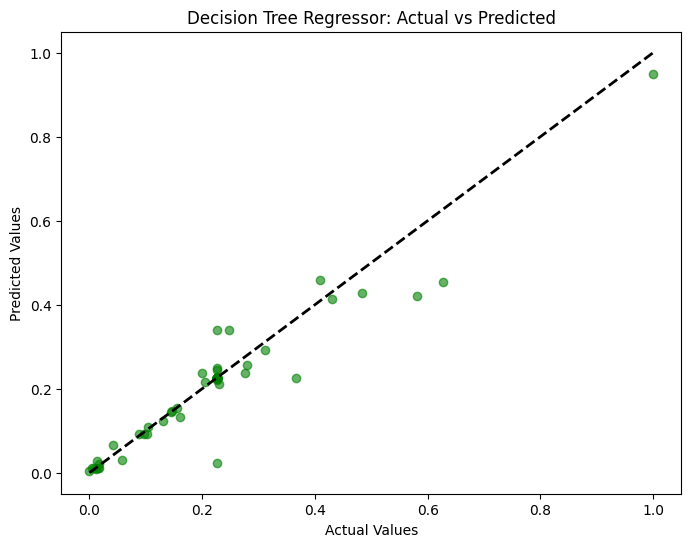

XGBoost Mean Squared Error: 0.0010
XGBoost R² Score: 0.9348


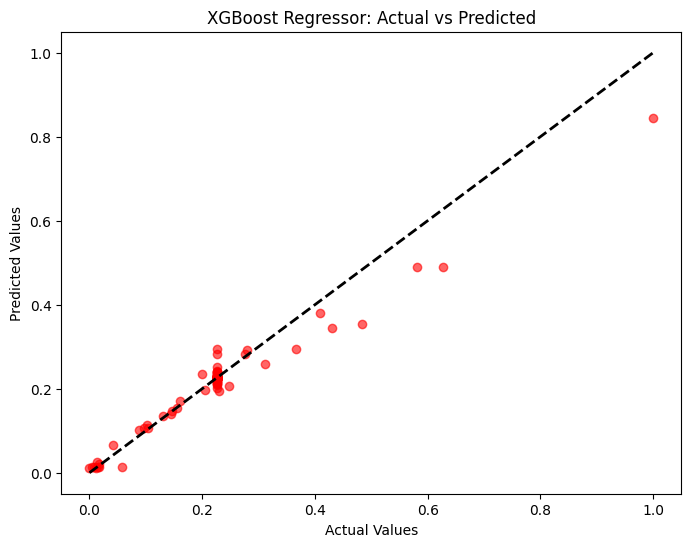

In [30]:
# Replace 'target_column' with the actual name of your target column
X1 = df.drop('Hydrogen uptake/adsorption (wt%)', axis=1)  # Features
X2 = df.drop('Hydrogen desorption (wt%)', axis=1)
y1 = df['Hydrogen uptake/adsorption (wt%)']  # Target
y2 = df['Hydrogen desorption (wt%)']

# Training Models for Hydrogen uptake/adsorption (wt%)
print("Training Models for Hydrogen uptake/adsorption (wt%)")
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# 1. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest Mean Squared Error: {rf_mse:.4f}")
print(f"Random Forest R² Score: {rf_r2:.4f}")

# Scatter plot for Random Forest Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Random Forest Regressor: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# 2. Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print(f"Decision Tree Mean Squared Error: {dt_mse:.4f}")
print(f"Decision Tree R² Score: {dt_r2:.4f}")

# Scatter plot for Decision Tree Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_predictions, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Decision Tree Regressor: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# 3. XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f"XGBoost Mean Squared Error: {xgb_mse:.4f}")
print(f"XGBoost R² Score: {xgb_r2:.4f}")

# Scatter plot for XGBoost Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_predictions, alpha=0.6, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("XGBoost Regressor: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Training Models for Hydrogen desorption (wt%)
print("Training Models for Hydrogen desorption (wt%)")
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# 1. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest Mean Squared Error: {rf_mse:.4f}")
print(f"Random Forest R² Score: {rf_r2:.4f}")

# Scatter plot for Random Forest Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Random Forest Regressor: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# 2. Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print(f"Decision Tree Mean Squared Error: {dt_mse:.4f}")
print(f"Decision Tree R² Score: {dt_r2:.4f}")

# Scatter plot for Decision Tree Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_predictions, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Decision Tree Regressor: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# 3. XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f"XGBoost Mean Squared Error: {xgb_mse:.4f}")
print(f"XGBoost R² Score: {xgb_r2:.4f}")

# Scatter plot for XGBoost Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_predictions, alpha=0.6, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("XGBoost Regressor: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


Based on the above tests of the model, the XGBoost regression is the most accurate regression model for this dataset. Going forward, I will be using this model because it has the best chance of giving a high level of accuracy.

Baseline XGBoost Mean Squared Error: 0.0013
Baseline XGBoost R² Score: 0.8397
Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 300}
Optimized XGBoost Mean Squared Error: 0.0013
Optimized XGBoost R² Score: 0.8425


Text(0, 0.5, 'Predicted Values')

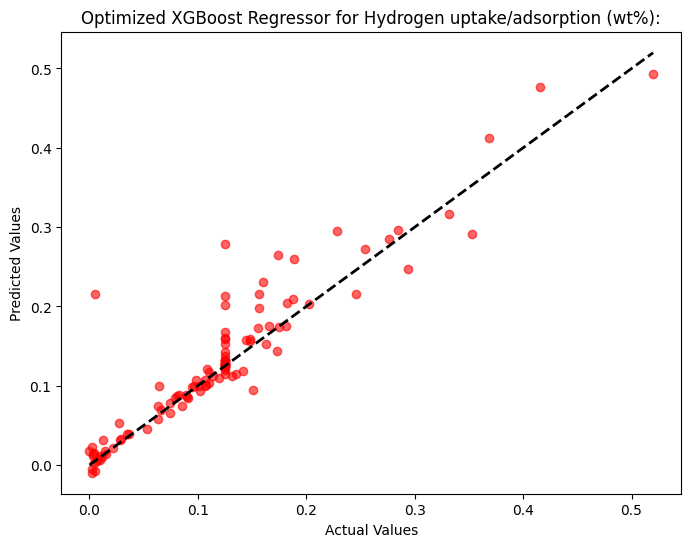

In [38]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Step 1: Train a baseline XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Step 2: Predict on the test set and evaluate performance
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f"Baseline XGBoost Mean Squared Error: {xgb_mse:.4f}")
print(f"Baseline XGBoost R² Score: {xgb_r2:.4f}")

# Step 3: Hyperparameter tuning using GridSearchCV
# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_child_weight': [1, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Initialize GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Step 4: Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Step 5: Train the XGBoost Regressor with the best hyperparameters
best_xgb_model = grid_search.best_estimator_

# Step 6: Evaluate the optimized model
best_xgb_predictions = best_xgb_model.predict(X_test)
best_xgb_mse = mean_squared_error(y_test, best_xgb_predictions)
best_xgb_r2 = r2_score(y_test, best_xgb_predictions)
print(f"Optimized XGBoost Mean Squared Error: {best_xgb_mse:.4f}")
print(f"Optimized XGBoost R² Score: {best_xgb_r2:.4f}")

# Step 7: Plot the actual vs predicted scatter plot for the optimized model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_xgb_predictions, alpha=0.6, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Optimized XGBoost Regressor for Hydrogen uptake/adsorption (wt%):")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")


Baseline XGBoost Mean Squared Error: 0.0010
Baseline XGBoost R² Score: 0.9348
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 300}
Optimized XGBoost Mean Squared Error: 0.0007
Optimized XGBoost R² Score: 0.9493


Text(0, 0.5, 'Predicted Values')

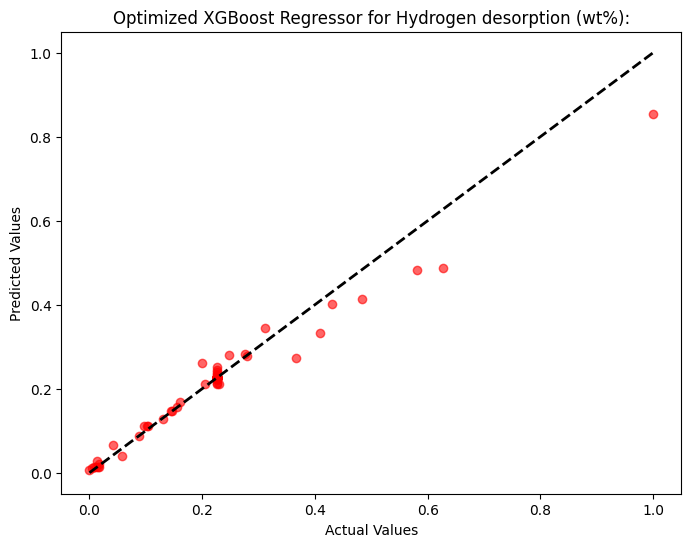

In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Step 1: Train a baseline XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Step 2: Predict on the test set and evaluate performance
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f"Baseline XGBoost Mean Squared Error: {xgb_mse:.4f}")
print(f"Baseline XGBoost R² Score: {xgb_r2:.4f}")

# Step 3: Hyperparameter tuning using GridSearchCV
# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_child_weight': [1, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Initialize GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Step 4: Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Step 5: Train the XGBoost Regressor with the best hyperparameters
best_xgb_model = grid_search.best_estimator_

# Step 6: Evaluate the optimized model
best_xgb_predictions = best_xgb_model.predict(X_test)
best_xgb_mse = mean_squared_error(y_test, best_xgb_predictions)
best_xgb_r2 = r2_score(y_test, best_xgb_predictions)
print(f"Optimized XGBoost Mean Squared Error: {best_xgb_mse:.4f}")
print(f"Optimized XGBoost R² Score: {best_xgb_r2:.4f}")

# Step 7: Plot the actual vs predicted scatter plot for the optimized model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_xgb_predictions, alpha=0.6, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Optimized XGBoost Regressor for Hydrogen desorption (wt%):")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")


Model Evaluation:

Evaluate your model using the test dataset.
Use metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² score to assess model performance.

To analyze feature importance using techniques like permutation importance or SHAP (SHapley Additive exPlanations) values for your XGBoost model, you can follow the steps below. I will provide examples for both permutation importance and SHAP values.

1. Permutation Importance
Permutation importance measures the change in model performance when the values of a feature are permuted, breaking the relationship between the feature and the target variable.

                                              Feature  Importance
5                                      Pressure (bar)    2.174410
4                                     Temperature (K)    1.794071
6                           Hydrogen desorption (wt%)    0.582066
3                                 Pore volume (cm³/g)    0.191702
0                           Average crystal size (nm)    0.146971
2                             BET surface area (m²/g)    0.112962
25  Material name_SWCNT doped with Mg-Ni-Cu(Mg39.6...    0.059775
1                              Crystalinity index (%)    0.008414
24  Material name_SWCNT doped with Mg-Ni(Mg45w%,Ni...    0.002978
21  Material name_Nitrogen-doped carbon nanorods a...    0.001451
7   Material name_CNT decorated with Ni at mass ra...    0.000760
20  Material name_Multi-walled carbon nanotube fun...    0.000625
11  Material name_Carbon nanotube doped with Pd na...    0.000508
12  Material name_Carbon nanotube doped with Pd na...    0.000040
19  Materi

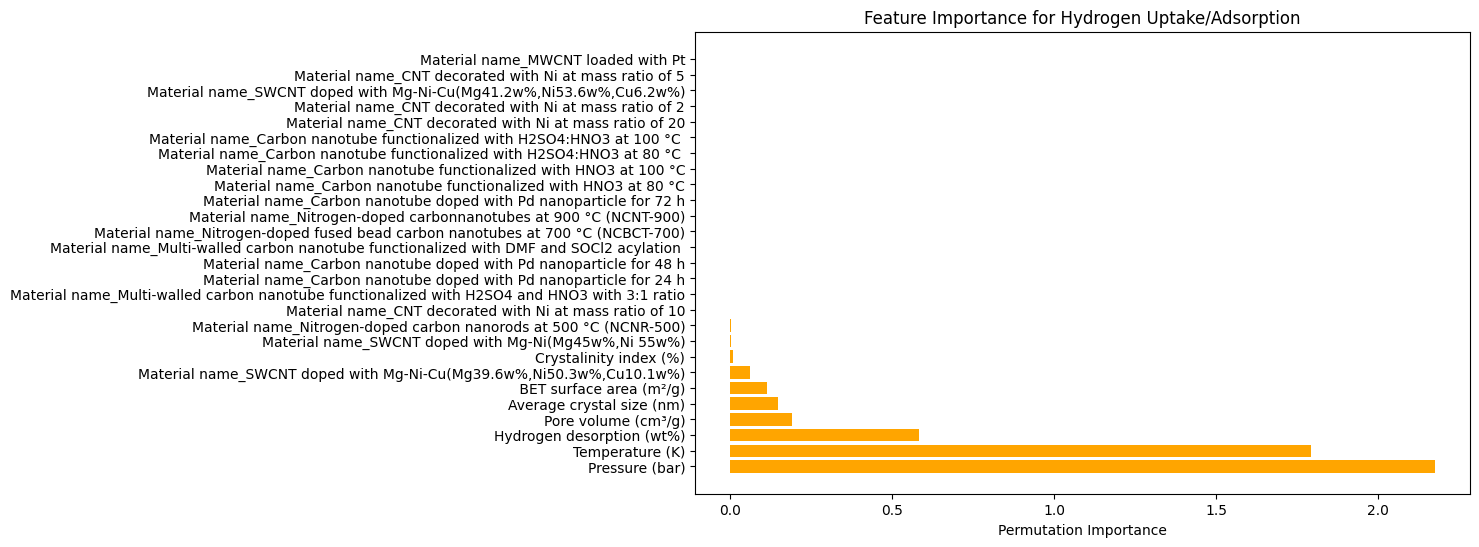

                                              Feature  Importance
5                                      Pressure (bar)    1.656313
6                    Hydrogen uptake/adsorption (wt%)    0.493232
1                              Crystalinity index (%)    0.407663
0                           Average crystal size (nm)    0.283020
4                                     Temperature (K)    0.274488
2                             BET surface area (m²/g)    0.158329
3                                 Pore volume (cm³/g)    0.006662
21  Material name_Nitrogen-doped carbon nanorods a...    0.004076
20  Material name_Multi-walled carbon nanotube fun...    0.000533
18                 Material name_MWCNT loaded with Pt    0.000078
17  Material name_Carbon nanotube functionalized w...    0.000000
25  Material name_SWCNT doped with Mg-Ni-Cu(Mg39.6...    0.000000
24  Material name_SWCNT doped with Mg-Ni(Mg45w%,Ni...    0.000000
23  Material name_Nitrogen-doped fused bead carbon...    0.000000
22  Materi

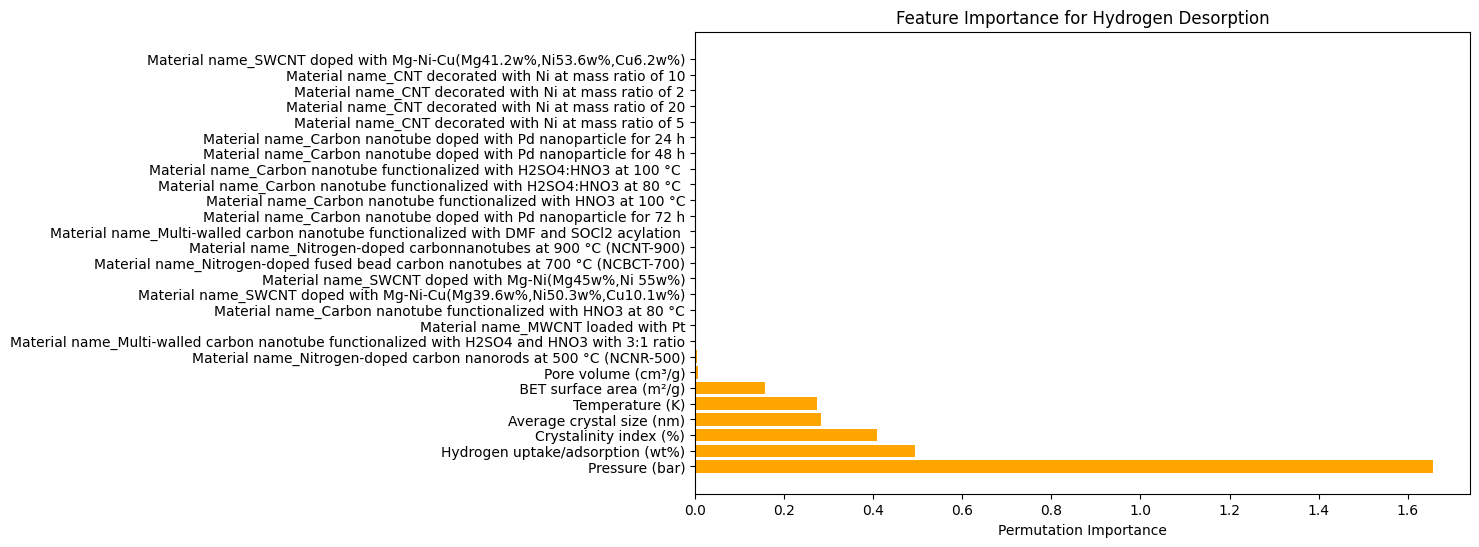

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor  # Import XGBoost Regressor

# Function to train model and calculate permutation importance
def train_and_evaluate_permutation_importance(X, y, title):
    # Step 1: Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 2: Train the XGBoost model
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Step 3: Calculate permutation importance
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

    # Step 4: Create a DataFrame for feature importance
    importance_df = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_importance.importances_mean
    }).sort_values(by='Importance', ascending=False)

    # Step 5: Display feature importance
    print(importance_df)

    # Step 6: Plotting feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='orange')
    plt.xlabel('Permutation Importance')
    plt.title(title)
    plt.show()

# Calculate and plot permutation importance for Hydrogen uptake/adsorption
train_and_evaluate_permutation_importance(X1, y1, 'Feature Importance for Hydrogen Uptake/Adsorption')

# Calculate and plot permutation importance for Hydrogen desorption
train_and_evaluate_permutation_importance(X2, y2, 'Feature Importance for Hydrogen Desorption')


# Conclusion and Implications:
Based on the analysis conducted using machine learning models, we can conclude that hydrogen uptake and hydrogen desorption can be effectively modeled, achieving an impressive accuracy with R² values exceeding 0.9. This high level of accuracy indicates that the models are capable of capturing the underlying relationships between the input features and the target variables. Consequently, these models can facilitate the prediction of future hydrogen uptake and desorption values under various conditions, which is crucial for optimizing hydrogen storage systems.

# Practical Applications:

The ability to predict hydrogen behavior in different scenarios can significantly aid in designing and engineering systems that maximize hydrogen storage efficiency. By understanding the conditions that enhance uptake and desorption, researchers and engineers can optimize storage systems for better performance. This has significant implications for various applications, including fuel cells, industrial processes, and renewable energy systems, where efficient hydrogen storage is essential for sustainability and performance.